In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7da91054b370>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig = px.histogram(medical_df,
                   x= 'age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title = 'Annual Medical Charges divide for smoking')
fig.update_layout(bargap = 0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'sex',
                   color_discrete_sequence=['pink', 'blue'],
                   title = 'Annual Medical Charges per Sex')
fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'region',
                   color_discrete_sequence=['green', 'yellow', 'red', 'blue'],
                   title = 'Annual Medical Charges per Region')
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
px.histogram(medical_df,
             x='smoker',
             color='sex',
             title='Smoker')

In [18]:
px.histogram(medical_df,
             x='region',
             title='Region Distribution')

In [19]:
px.histogram(medical_df,
             x='sex',
             title='Sex Distribution')

In [20]:
px.histogram(medical_df,
             x='children',
             title='Children Distribution')

In [21]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data='sex',
                 title='Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [22]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data='sex',
                 title='Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [23]:
px.violin(medical_df, x='sex', y='charges')

In [24]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [25]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [26]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [27]:
smoker_values = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [28]:
sex_values = {'female' : 0, 'male' : 1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

np.float64(0.057292062202025484)

In [29]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [30]:
medical_df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

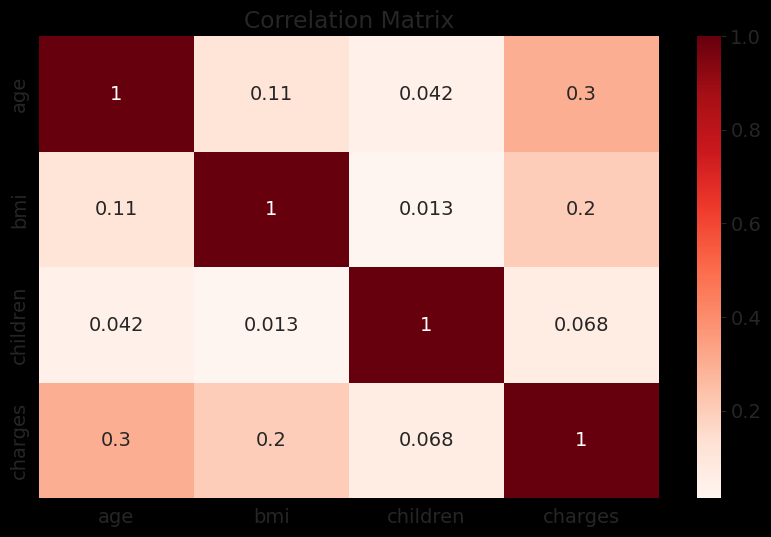

In [31]:
sns.heatmap(medical_df.corr(numeric_only = True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [32]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges for non smoker'}, xlabel='age', ylabel='charges'>

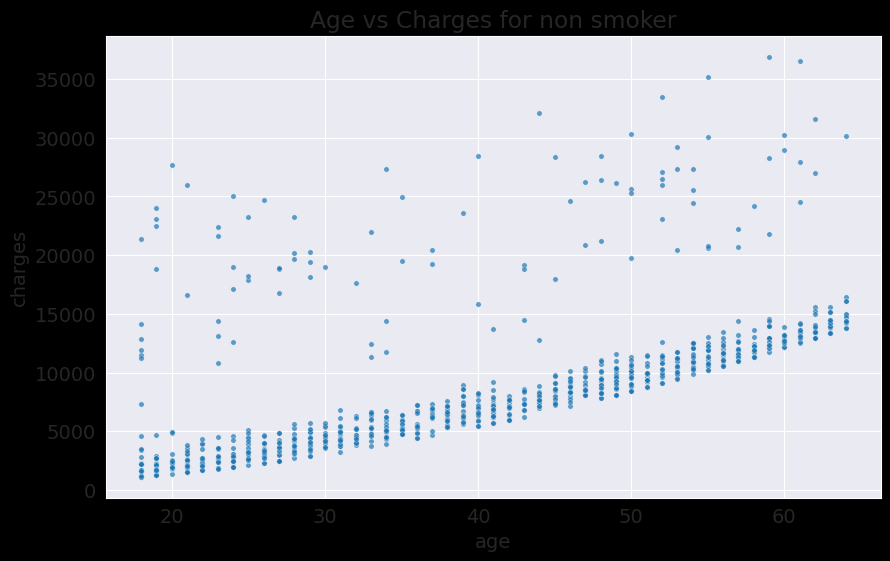

In [33]:
plt.title('Age vs Charges for non smoker')
sns.scatterplot(data=non_smoker_df,
                x='age',
                y='charges',
                alpha=0.7,
                s=15)

In [34]:
def estimate_charges(age, w, b):
    return w*age+b

In [35]:
w=100
b=100

In [36]:
estimate_charges(30,w, b)

3100

In [37]:
ages=non_smoker_df.age
estimate_charges = estimate_charges(ages,w, b)

Text(0, 0.5, 'Estimated Charges')

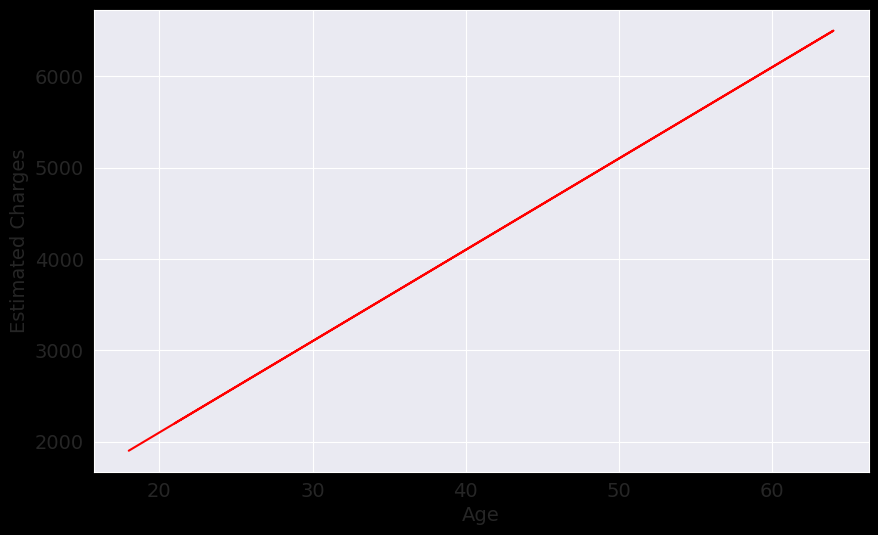

In [38]:
plt.plot(ages, estimate_charges, color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

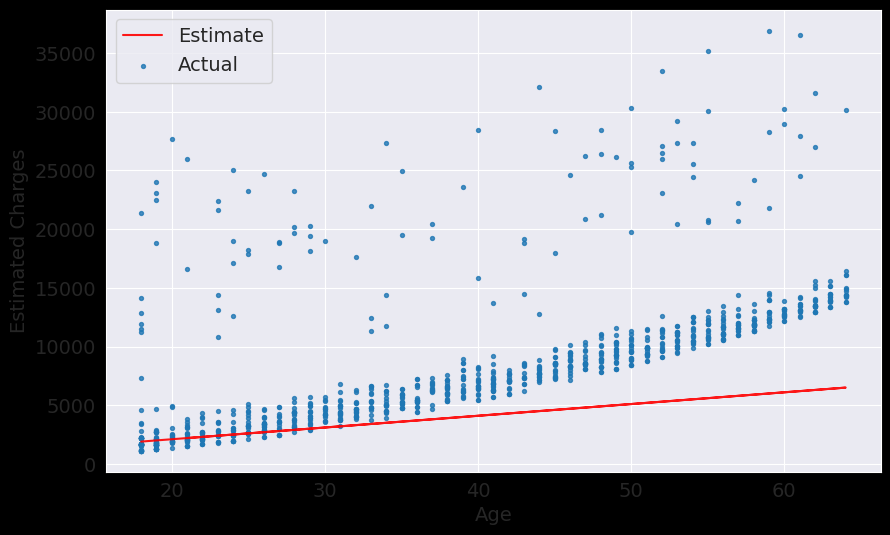

In [39]:
target = non_smoker_df.charges

plt.plot(ages, estimate_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.legend(['Estimate', 'Actual'])

In [40]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages,w ,b )

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

In [41]:
def estimate_charges(age, w, b):
    return w*age+b

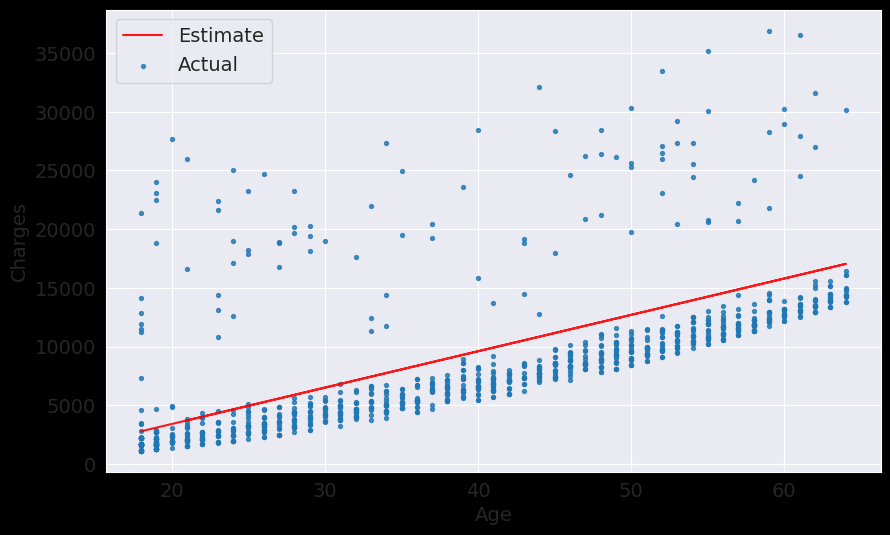

In [42]:
try_parameters(310, -2800)

In [43]:
import numpy as np

In [44]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [45]:
w = 50
b = 100

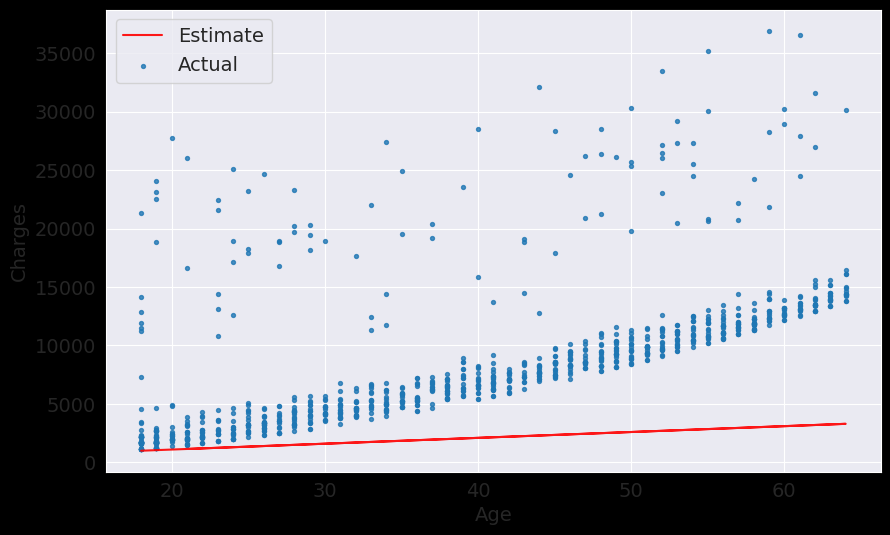

In [46]:
try_parameters(w, b)

In [47]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w , b)

In [48]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [49]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions  = estimate_charges(ages,w ,b )

    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss =rmse(target, predictions)
    print('RMSE Loss :', loss)

RMSE Loss : 4673.508821970761


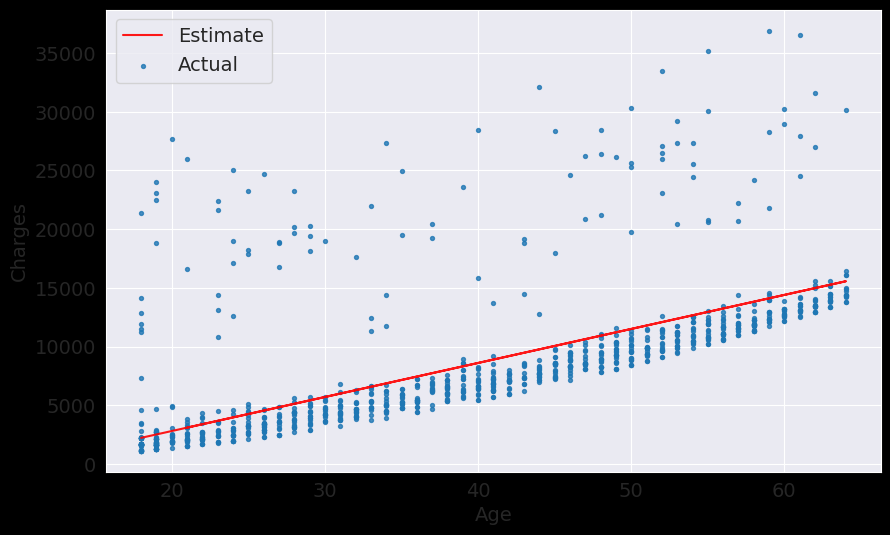

In [50]:
try_parameters(290, -3000)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [54]:
inputs = non_smoker_df[['age']]
targets=non_smoker_df.charges
print('input.shape :', inputs.shape)
print('targets.shape :', targets.shape)

input.shape : (1064, 1)
targets.shape : (1064,)


In [55]:
model.fit(inputs, targets)

LinearRegression()

In [56]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/home/kurios/Documents/Machine_Learning/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [57]:
predictions = model.predict(inputs)

In [58]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [59]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [60]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [61]:
model.coef_

array([267.24891283])

In [62]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss : 4662.505766636395


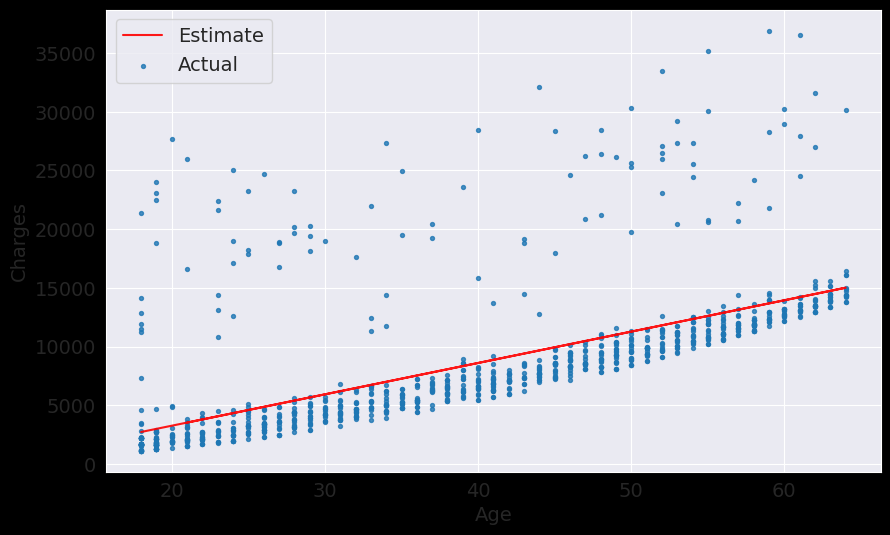

In [63]:
try_parameters(model.coef_, model.intercept_)

In [64]:
from sklearn.linear_model import SGDRegressor

RMSE Loss : 4950.5721111360945


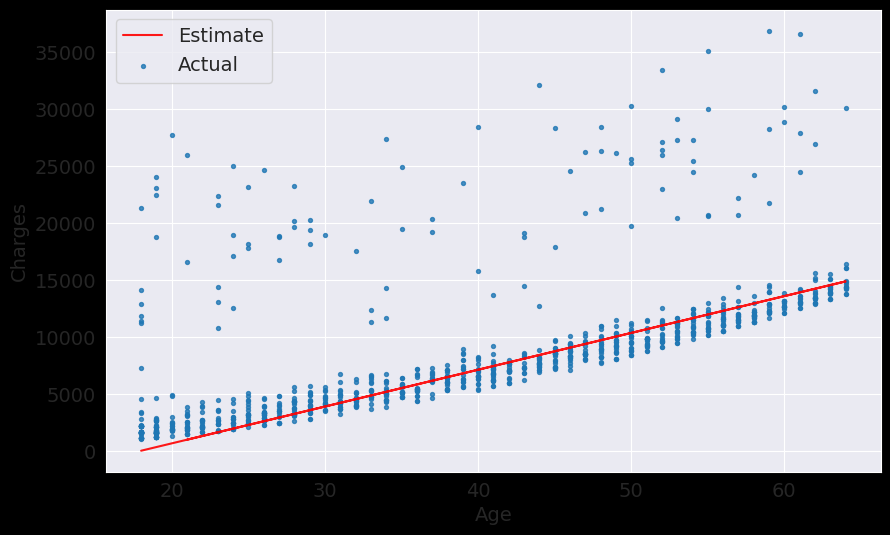

In [65]:
inputs, targets = non_smoker_df[['age']], non_smoker_df.charges
model = SGDRegressor().fit(inputs, targets)
predictions = model.predict(inputs)
try_parameters(model.coef_, model.intercept_)

In [66]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [67]:
def multiple_estimate_charges(age, bmi, w, w2, b):
    return w*age + w2*bmi + b

def try_multiple_parameters_non_smoker(w, w2, b):
    ages = non_smoker_df.age
    bmi = non_smoker_df.bmi
    target = non_smoker_df.charges
    predictions  =  multiple_estimate_charges(ages, bmi, w, w2, b)

    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss =rmse(target, predictions)
    print('RMSE Loss :', loss)


In [68]:
def try_parameters_smoker(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions  = estimate_charges(ages,w ,b )

    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss =rmse(target, predictions)
    print('RMSE Loss :', loss)

def try_multiple_parameters_smoker(w, w2, b):
    ages = smoker_df.age
    bmis = smoker_df.bmi
    target = smoker_df.charges
    predictions  =  multiple_estimate_charges(ages, bmis, w, w2, b)

    plt.plot(bmis, predictions, 'r', alpha = 0.9)
    plt.scatter(bmis, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss =rmse(target, predictions)
    print('RMSE Loss :', loss)

RMSE Loss : 10711.00334810241


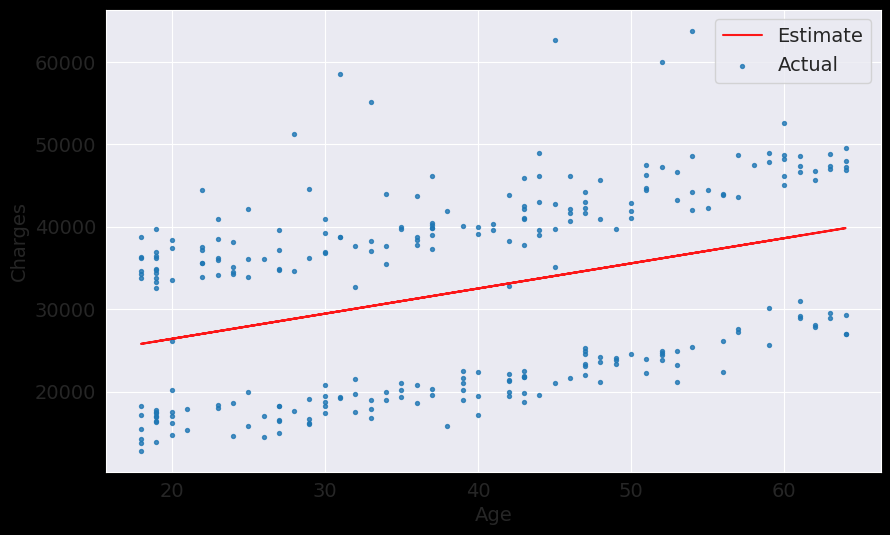

In [69]:
inputs, targets = smoker_df[['age']] , smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
try_parameters_smoker(model.coef_, model.intercept_)

RMSE Loss : 7556435213.010157


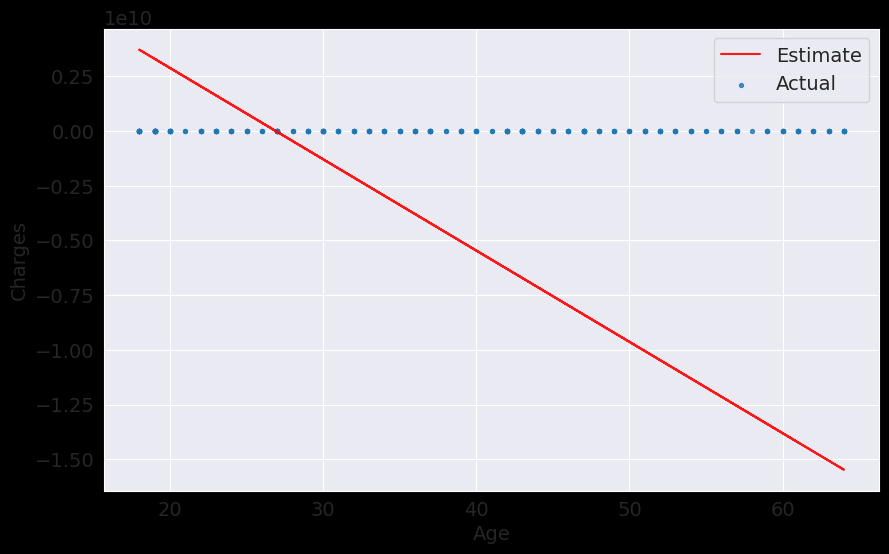

In [70]:
inputs, targets = smoker_df[['age']], smoker_df.charges
model = SGDRegressor().fit(inputs, targets)
predictions = model.predict(inputs)
try_parameters_smoker(model.coef_, model.intercept_)

RMSE Loss : 4662.3128354612945


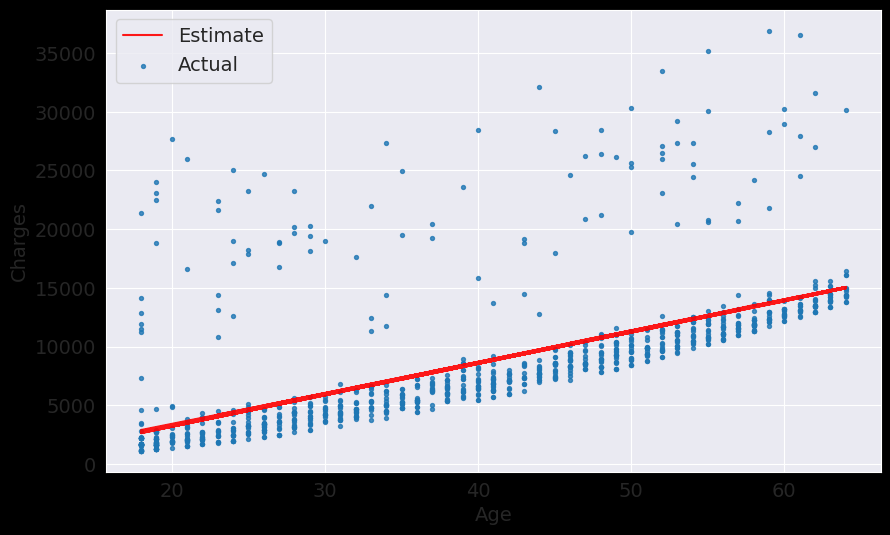

In [71]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

try_multiple_parameters_non_smoker(model.coef_[0],model.coef_[1] , model.intercept_)

In [72]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

RMSE Loss : 5722.782238884455


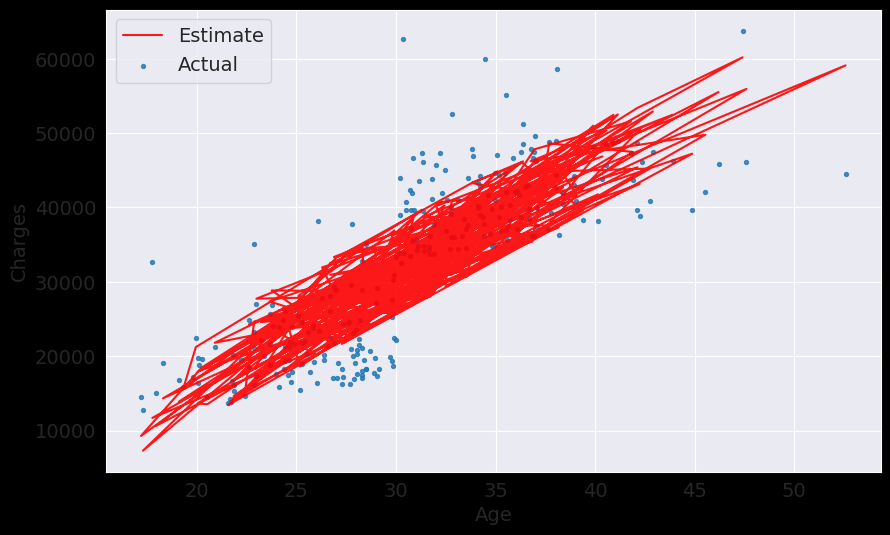

In [73]:
inputs, targets = smoker_df[['age', 'bmi']], smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

try_multiple_parameters_smoker(model.coef_[0],model.coef_[1] , model.intercept_)

In [74]:
def try_parameters_bmi(w, b):
    bmis = non_smoker_df.bmi
    target = non_smoker_df.charges
    predictions  = estimate_charges(bmis,w ,b )

    plt.plot(bmis, predictions, 'r', alpha = 0.9)
    plt.scatter(bmis, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss =rmse(target, predictions)
    print('RMSE Loss :', loss)

RMSE Loss : 5969.772531913293


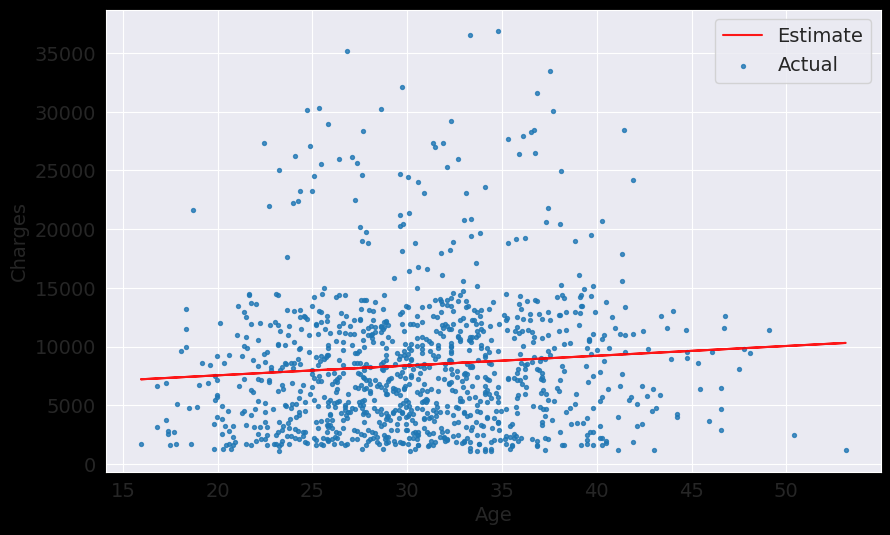

In [75]:
inputs, targets = non_smoker_df[['bmi']] , non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
try_parameters_bmi(model.coef_, model.intercept_)

In [76]:
def try_parameters_smoker_bmi(w, b):
    bmis = smoker_df.bmi
    target = smoker_df.charges
    predictions  = estimate_charges(bmis,w ,b )

    plt.plot(bmis, predictions, 'r', alpha = 0.9)
    plt.scatter(bmis, target, s=8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss =rmse(target, predictions)
    print('RMSE Loss :', loss)


RMSE Loss : 6811.59740830196


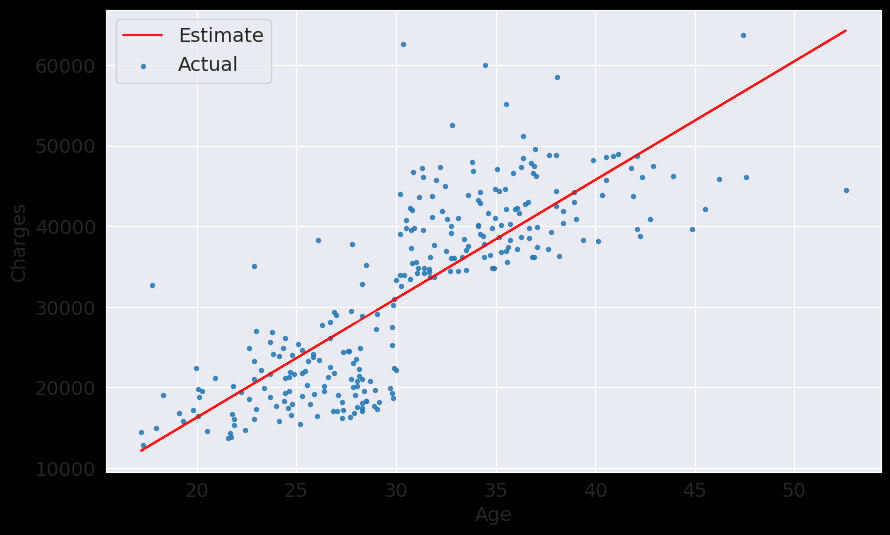

In [77]:
inputs, targets = smoker_df[['bmi']] , smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
try_parameters_smoker_bmi(model.coef_, model.intercept_)

In [78]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [79]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children vs Charges')
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

In [80]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss= rmse(targets, predictions)

print('Loss: ', loss)

Loss:  4608.470405038247


In [81]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss= rmse(targets, predictions)

print('Loss: ', loss)

Loss:  5718.202480524154


In [82]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss= rmse(targets, predictions)

print('Loss: ', loss)

Loss:  11355.317901125973


<Axes: xlabel='smoker', ylabel='charges'>

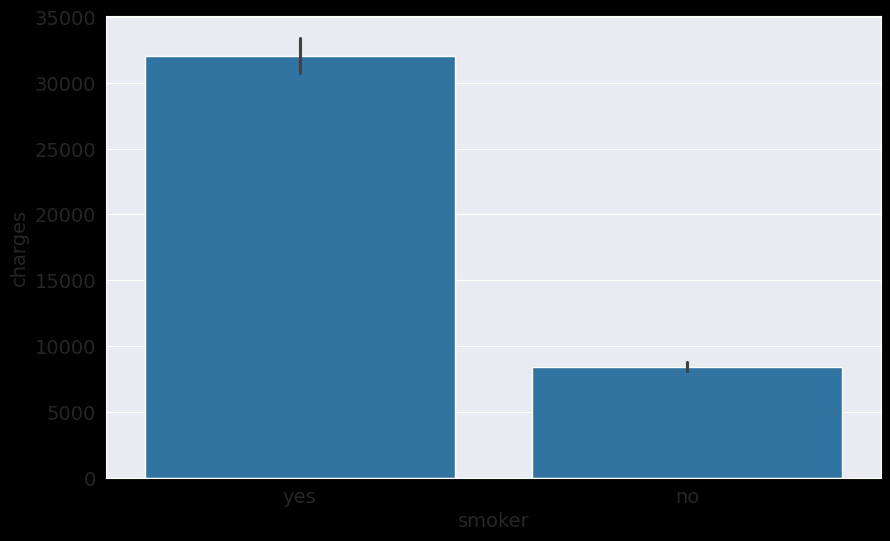

In [83]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [84]:
smoker_codes = {'no' : 0, 'yes' : 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [85]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [86]:
inputs, targets  = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


In [87]:
sex_codes = {'female' : 0, 'male' : 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [88]:
inputs, targets  = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

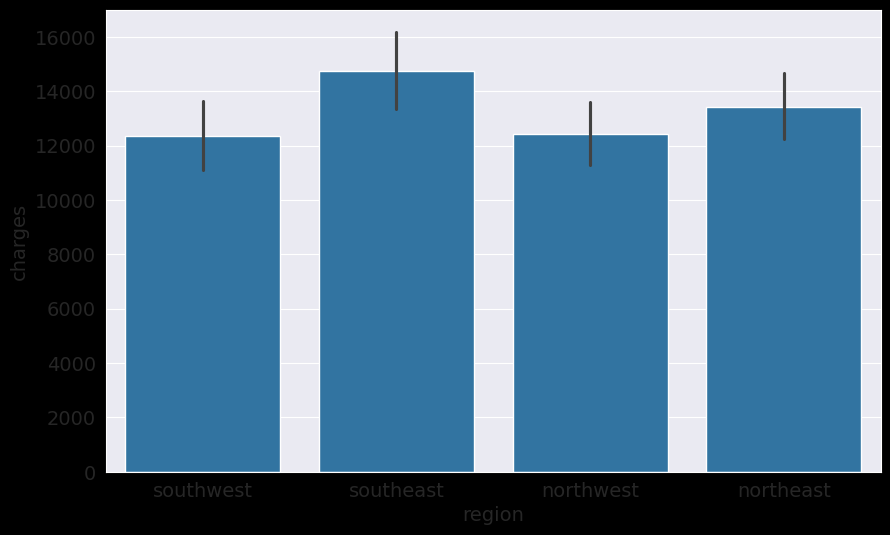

In [89]:
sns.barplot(data=medical_df, x='region', y='charges')

In [90]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [95]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [97]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [98]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [100]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets  = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [102]:
sex_codes = {'female' : 0, 'male' : 1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes)
enc.fit(non_smoker_df[['region']])
enc.categories_
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

/tmp/ipykernel_17457/4179167247.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17457/4179167247.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17457/4179167247.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1

In [104]:
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets  = non_smoker_df[input_cols], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4573.074988795492


In [105]:
sex_codes = {'female' : 0, 'male' : 1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes)
enc.fit(smoker_df[['region']])
enc.categories_
one_hot = enc.transform(smoker_df[['region']]).toarray()
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

/tmp/ipykernel_17457/701227299.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17457/701227299.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17457/701227299.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1745

In [106]:
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets  = smoker_df[input_cols], smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5668.4678821121515


In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [110]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [111]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [112]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [113]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data =medical_df[cat_cols].values

In [115]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [118]:
cat_cols

['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

In [116]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customer = [[25, 21, 0, 0, 0, 0, 0, 0, 1]]

In [141]:
scaler.transform([[25, 21, 0]])

/home/kurios/Documents/Machine_Learning/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.01155712, -1.58522691, -0.90861367]])

In [144]:
model.predict([[-1.01155712, -1.58522691, -0.90861367, 0, 0, 0, 0, 0, 1]])

array([645.88177535])